In [1]:
import pandas as pd
import random
import sqlite3

<h2> Win streaks: So they matter, or are they just silly? </h2>

I have an inkling already about streaks in a vacuum, so let's try something.

In [2]:
# make a team with some winning percentage and test how far they go based on luck

def longest_streak(pct):
    longest = 0
    current = 0

    for i in range(162):
        r = random.random()
        if r < pct:
            current += 1
            if current > longest:
                longest = current
        else:
            current = 0
    
    return longest

In [3]:
# Let's simulate one hundred seasons for each of them, and see the spread. 

third = []
half = []
twothirds = []
athletics = []

for i in range (100):
    third.append(longest_streak(0.3333333))
    half.append(longest_streak(0.5))
    twothirds.append(longest_streak(0.6666667))
    athletics.append(longest_streak(0.636))

print(half)

[10, 5, 9, 6, 8, 9, 5, 8, 8, 7, 7, 5, 8, 6, 9, 5, 7, 7, 8, 7, 7, 7, 6, 9, 4, 4, 5, 5, 10, 5, 9, 4, 5, 6, 5, 5, 6, 6, 5, 6, 10, 7, 4, 6, 6, 5, 5, 8, 6, 6, 7, 5, 4, 6, 9, 8, 10, 6, 5, 9, 4, 6, 6, 5, 6, 3, 6, 11, 6, 6, 12, 8, 9, 9, 5, 6, 7, 5, 6, 7, 6, 8, 7, 6, 6, 6, 5, 6, 8, 5, 5, 11, 5, 5, 8, 8, 6, 9, 5, 7]


<Axes: >

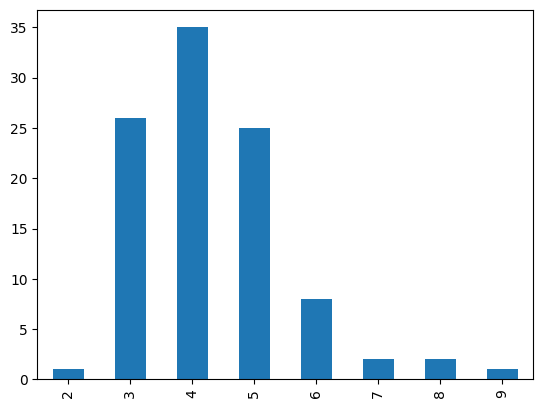

In [25]:
# 33 percent
pd.Series(third).value_counts().sort_index().plot.bar()

<Axes: >

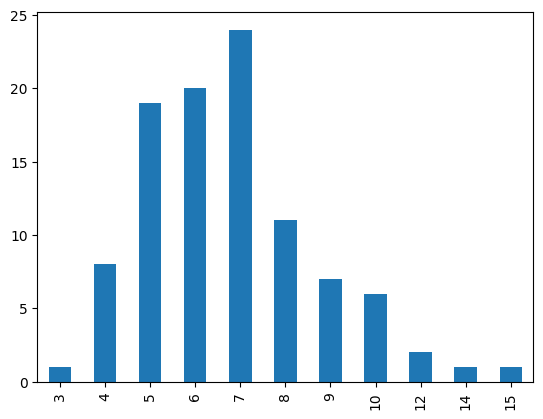

In [19]:
# 50 percent
pd.Series(half).value_counts().sort_index().plot.bar()

<Axes: >

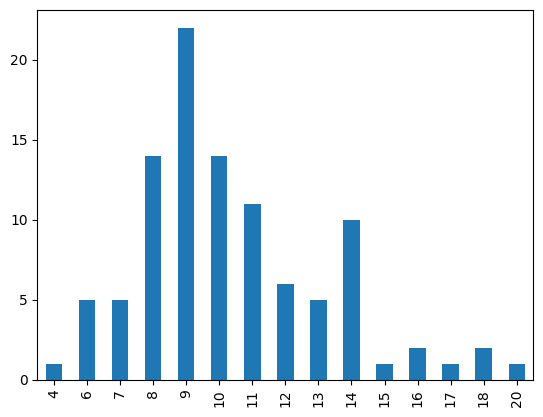

In [27]:
# 67 percent
pd.Series(twothirds).value_counts().sort_index().plot.bar()

<Axes: >

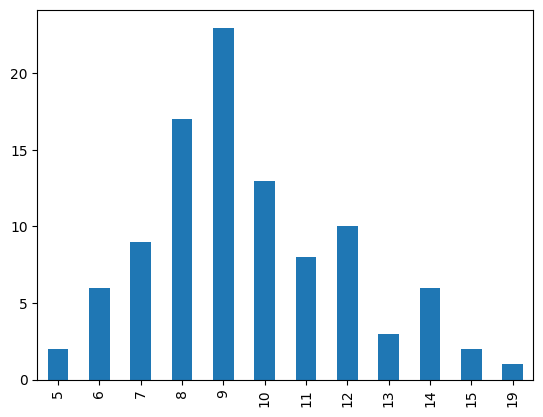

In [4]:
pd.Series(athletics).value_counts().sort_index().plot.bar()

Data import

In [35]:
s = "date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info"
header = s.split(",")

In [38]:
for i in range(2000,2023):
    logs_23 = pd.read_csv("data/rs/gl2023.txt", names=header)

In [52]:
connection_obj = sqlite3.connect(database='mlb.db', isolation_level=None)
cursor_obj = connection_obj.cursor()
cursor_obj.execute("DROP TABLE IF EXISTS GAMES_TEST")
 
data = pd.read_csv("data/rs/gl2023.txt", names=header)
data.to_sql("GAMES_TEST", connection_obj, if_exists="replace")

connection_obj.commit()

cursor_obj.execute('select * from GAMES_TEST')

connection_obj.close()

OperationalError: database is locked

In [48]:
connection_obj.commit()